In [1]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

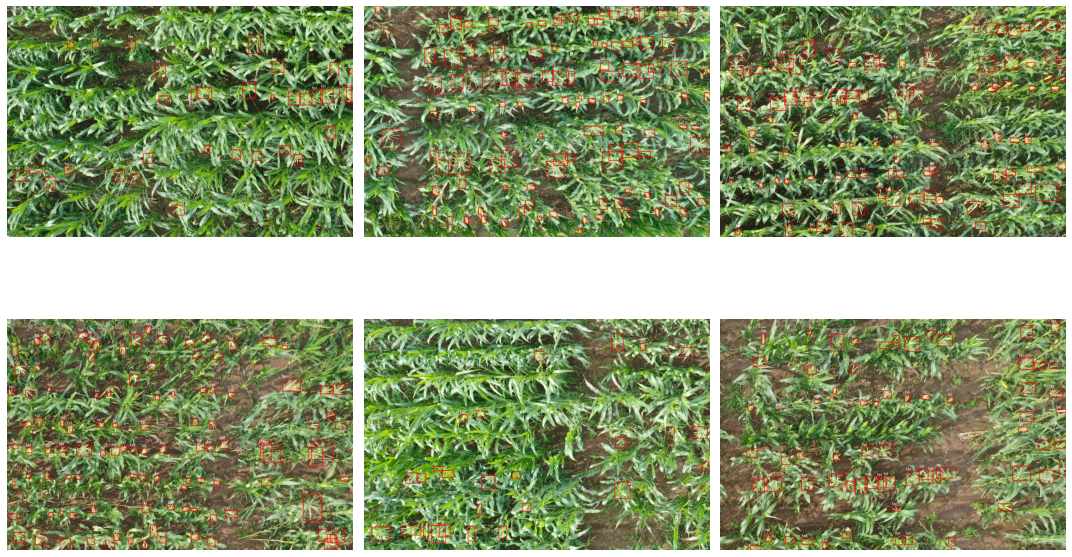

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "/home/user/CourseWork/datasets/Maize_Tassel_Small/train/images"
labels_folder = "/home/user/CourseWork/datasets/Maize_Tassel_Small/train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 3)  # Увеличенная толщина
        font_scale = 1.0  # Увеличенный масштаб шрифта
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolo11s.pt")

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

New https://pypi.org/project/ultralytics/8.3.109 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=data.yaml , epochs=80, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO11s, name=3_aug, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F

train: Scanning /home/user/CourseWork/datasets/Maize_Tassel_Small/train/labels.cache... 485 images, 0 backgrounds, 0 corrupt: 100%|██████████| 485/485 [00:00<?, ?it/s]
val: Scanning /home/user/CourseWork/datasets/Maize_Tassel_Small/valid/labels.cache... 124 images, 0 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<?, ?it/s]


Plotting labels to YOLO11s/3_aug/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to YOLO11s/3_aug
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      6.76G      4.706      3.129      2.031        410        416: 100%|██████████| 16/16 [00:06<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all        124       7610     0.0238      0.115     0.0191    0.00497


2025-04-16 15:46:35,755 - clearml - INFO - inf value encountered. Reporting it as '0.0'. Use clearml.Logger.set_reporting_inf_value to assign another value

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      7.46G       3.13      1.802      1.132        878        416: 100%|██████████| 16/16 [00:02<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all        124       7610     0.0927      0.453      0.192     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      6.11G      2.858      1.643      1.069        669        416: 100%|██████████| 16/16 [00:02<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all        124       7610     0.0671      0.289     0.0535     0.0142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      6.94G      2.768      1.583      1.042        787        416: 100%|██████████| 16/16 [00:02<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all        124       7610      0.253      0.319      0.232     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      6.29G      2.735      1.561      1.041        622        416: 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all        124       7610      0.239      0.305      0.185     0.0517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      7.26G      2.684      1.516      1.023        512        416: 100%|██████████| 16/16 [00:02<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all        124       7610      0.405      0.403      0.317     0.0937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      6.14G      2.689      1.532      1.024       3704        416:  62%|██████▎   | 10/16 [00:01<00:00,  6.99it/s]

2025-04-16 15:46:57,851 - clearml.storage - INFO - Uploading: 0.94MB to YOLO11s/3_aug/train_batch2.jpg


       7/80      6.21G      2.697      1.539      1.025        950        416: 100%|██████████| 16/16 [00:02<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]/home/user/.local/lib/python3.10/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
█████████████████████████████████ 100% | 0.94/0.94 MB [00:01<00:00,  1.10s/MB]: 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all        124       7610      0.241      0.404      0.187     0.0567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      7.57G      2.645       1.49      1.011        530        416: 100%|██████████| 16/16 [00:02<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all        124       7610      0.473      0.475      0.401      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      6.59G      2.561      1.424      1.009        309        416: 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all        124       7610      0.554      0.495      0.462      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      6.41G      2.605      1.449      1.017        933        416: 100%|██████████| 16/16 [00:02<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all        124       7610      0.541      0.483      0.429      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      6.86G      2.573      1.424      1.004        498        416: 100%|██████████| 16/16 [00:02<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all        124       7610      0.553      0.475      0.448      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      6.98G      2.588      1.447      1.005        350        416: 100%|██████████| 16/16 [00:02<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all        124       7610      0.567      0.479      0.468       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      5.74G      2.531      1.407     0.9976        637        416: 100%|██████████| 16/16 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all        124       7610      0.595      0.508      0.495      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      6.76G      2.541      1.388      0.991        506        416: 100%|██████████| 16/16 [00:02<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all        124       7610      0.601      0.517      0.495       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      5.44G      2.498      1.393     0.9932        338        416: 100%|██████████| 16/16 [00:02<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all        124       7610      0.622      0.515      0.504      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      6.07G       2.48      1.336      0.987        853        416: 100%|██████████| 16/16 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all        124       7610      0.626      0.519       0.52      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      7.05G      2.553      1.405     0.9925        885        416: 100%|██████████| 16/16 [00:02<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all        124       7610      0.586      0.508       0.49      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      7.21G      2.471      1.357     0.9896        696        416: 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all        124       7610       0.61      0.511      0.521      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      6.48G      2.534      1.396     0.9985        592        416: 100%|██████████| 16/16 [00:02<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all        124       7610      0.536      0.506      0.465      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      6.82G      2.472       1.37     0.9975        710        416: 100%|██████████| 16/16 [00:02<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all        124       7610      0.634      0.525      0.519      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80       6.5G        2.5      1.378     0.9884        579        416: 100%|██████████| 16/16 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all        124       7610      0.596      0.539       0.51      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      7.06G       2.46      1.339     0.9854        850        416: 100%|██████████| 16/16 [00:02<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all        124       7610      0.647      0.518      0.543      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      6.17G      2.494      1.349     0.9815        595        416: 100%|██████████| 16/16 [00:02<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all        124       7610      0.636      0.524      0.529      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      5.37G      2.438      1.339      0.986        420        416: 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all        124       7610      0.632      0.534      0.524       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      6.37G      2.456       1.34     0.9869        474        416: 100%|██████████| 16/16 [00:02<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all        124       7610      0.662      0.537      0.566      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      5.62G      2.428      1.315     0.9906        698        416: 100%|██████████| 16/16 [00:02<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all        124       7610      0.659      0.534      0.549      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      6.03G      2.452      1.329     0.9908        633        416: 100%|██████████| 16/16 [00:02<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all        124       7610      0.587      0.504      0.495      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      5.83G       2.44      1.343     0.9903        614        416: 100%|██████████| 16/16 [00:02<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all        124       7610      0.635      0.523      0.546      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      7.42G       2.43      1.307     0.9779        666        416: 100%|██████████| 16/16 [00:02<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all        124       7610      0.582      0.508      0.495       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      6.36G      2.434      1.313     0.9838        466        416: 100%|██████████| 16/16 [00:02<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all        124       7610      0.545       0.48      0.459      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      6.76G      2.469      1.341     0.9785        619        416: 100%|██████████| 16/16 [00:02<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all        124       7610      0.571       0.51      0.487      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      6.32G      2.392      1.285     0.9797        632        416: 100%|██████████| 16/16 [00:02<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all        124       7610      0.597      0.518      0.511      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80       5.5G      2.418      1.312     0.9841        705        416: 100%|██████████| 16/16 [00:02<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all        124       7610      0.625      0.529      0.537      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      7.05G      2.421      1.317      0.977        531        416: 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all        124       7610      0.636      0.521      0.553      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      6.46G      2.381      1.267     0.9717        665        416: 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all        124       7610      0.634      0.522      0.545      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      5.61G      2.409      1.299     0.9777        514        416: 100%|██████████| 16/16 [00:02<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all        124       7610      0.638      0.538      0.565      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      6.36G      2.443      1.333     0.9802       1163        416: 100%|██████████| 16/16 [00:02<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all        124       7610      0.618      0.532      0.537      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      6.34G      2.405      1.291     0.9762        434        416: 100%|██████████| 16/16 [00:02<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all        124       7610      0.636      0.556      0.568      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      7.19G      2.387      1.268     0.9669        664        416: 100%|██████████| 16/16 [00:02<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all        124       7610      0.617      0.547       0.55      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      5.72G      2.426      1.316     0.9798        779        416: 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all        124       7610      0.619      0.545      0.554      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80       6.6G      2.379      1.275     0.9668        408        416: 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all        124       7610      0.611      0.538      0.535      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      5.96G      2.377      1.257     0.9653        470        416: 100%|██████████| 16/16 [00:02<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all        124       7610      0.623      0.544       0.55      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      5.52G      2.368      1.268     0.9735        458        416: 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all        124       7610      0.659      0.541      0.579        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      7.03G      2.388      1.286      0.968        588        416: 100%|██████████| 16/16 [00:02<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all        124       7610       0.66      0.532      0.567      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      6.46G      2.394      1.269     0.9704        739        416: 100%|██████████| 16/16 [00:02<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all        124       7610      0.643      0.528      0.562      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      6.41G      2.401      1.273     0.9686        749        416: 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all        124       7610      0.619       0.54      0.538      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80       5.7G      2.357      1.256      0.977        658        416: 100%|██████████| 16/16 [00:02<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all        124       7610      0.641      0.538      0.567      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      7.21G      2.347      1.255     0.9695        307        416: 100%|██████████| 16/16 [00:02<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all        124       7610       0.68       0.56      0.594      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      6.14G      2.375      1.258     0.9782        701        416: 100%|██████████| 16/16 [00:02<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all        124       7610      0.629      0.523      0.547      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      5.22G      2.388      1.283     0.9669        855        416: 100%|██████████| 16/16 [00:02<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all        124       7610      0.657      0.545      0.575      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      6.06G       2.39      1.271     0.9676        884        416: 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all        124       7610      0.643      0.545      0.574        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      7.03G      2.396      1.278     0.9771        779        416: 100%|██████████| 16/16 [00:02<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all        124       7610      0.675      0.576        0.6      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      7.57G       2.38      1.261     0.9679        607        416: 100%|██████████| 16/16 [00:02<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all        124       7610      0.618      0.524      0.536      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      6.53G      2.354      1.241     0.9679        502        416: 100%|██████████| 16/16 [00:02<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all        124       7610      0.692      0.558      0.608      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      6.61G      2.349      1.247     0.9739        774        416: 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all        124       7610      0.657      0.582      0.592      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      6.45G      2.378      1.258     0.9652        859        416: 100%|██████████| 16/16 [00:02<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all        124       7610      0.584      0.495      0.504      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80       7.3G      2.369      1.252     0.9686        596        416: 100%|██████████| 16/16 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all        124       7610      0.648      0.535      0.573      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80       6.1G      2.323       1.24     0.9688        484        416: 100%|██████████| 16/16 [00:02<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all        124       7610      0.668      0.584      0.606      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      5.83G      2.338      1.233     0.9702        397        416: 100%|██████████| 16/16 [00:02<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all        124       7610      0.648       0.55      0.583      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      7.65G      2.334       1.24     0.9653        603        416: 100%|██████████| 16/16 [00:02<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all        124       7610       0.66      0.569      0.598      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      6.69G      2.353      1.243     0.9631        589        416: 100%|██████████| 16/16 [00:02<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all        124       7610      0.625      0.545      0.556      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      5.52G      2.336      1.224     0.9639        629        416: 100%|██████████| 16/16 [00:02<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all        124       7610      0.668      0.561      0.601      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      7.09G      2.331      1.248     0.9685        455        416: 100%|██████████| 16/16 [00:02<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all        124       7610      0.694      0.584      0.619       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      7.37G      2.361       1.25      0.969        436        416: 100%|██████████| 16/16 [00:02<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all        124       7610      0.654      0.578      0.597      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      6.45G      2.327      1.233     0.9648        564        416: 100%|██████████| 16/16 [00:02<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all        124       7610       0.64       0.56      0.577      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      6.32G      2.354      1.244     0.9681        767        416: 100%|██████████| 16/16 [00:02<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all        124       7610      0.656      0.561      0.577      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      6.23G      2.265      1.179     0.9597        493        416: 100%|██████████| 16/16 [00:02<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all        124       7610      0.629      0.549      0.568      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      4.97G      2.345      1.229      0.965        905        416: 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all        124       7610      0.643      0.549       0.57      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      5.87G      2.315       1.21     0.9645        678        416: 100%|██████████| 16/16 [00:02<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all        124       7610       0.63      0.544      0.566      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      5.85G      2.308      1.216     0.9604        269        416: 100%|██████████| 16/16 [00:02<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all        124       7610      0.659      0.576      0.599      0.213


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      4.77G      2.156       1.23     0.9635        308        416: 100%|██████████| 16/16 [00:05<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all        124       7610      0.648      0.566      0.593      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      4.08G      2.136      1.134     0.9597        264        416: 100%|██████████| 16/16 [00:02<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all        124       7610      0.666      0.576      0.613      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      4.76G      2.105      1.121     0.9534        164        416: 100%|██████████| 16/16 [00:02<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all        124       7610      0.642      0.564      0.588      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      4.15G       2.09      1.092     0.9596        267        416: 100%|██████████| 16/16 [00:02<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all        124       7610      0.661      0.574      0.597      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      4.04G      2.126      1.104     0.9501        255        416: 100%|██████████| 16/16 [00:02<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all        124       7610      0.626      0.563      0.573      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      4.35G      2.126        1.1     0.9511        338        416: 100%|██████████| 16/16 [00:01<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all        124       7610      0.663      0.575      0.598      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      3.98G      2.101      1.098     0.9583        157        416: 100%|██████████| 16/16 [00:01<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all        124       7610      0.648      0.564      0.589      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80       4.6G      2.099      1.079     0.9511        372        416: 100%|██████████| 16/16 [00:02<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all        124       7610      0.632      0.557      0.578      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      4.19G      2.091      1.076     0.9525        360        416: 100%|██████████| 16/16 [00:02<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all        124       7610      0.657       0.57      0.597      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      4.03G      2.081      1.072     0.9542        248        416: 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all        124       7610      0.651      0.569      0.592      0.204



80 epochs completed in 0.089 hours.
Optimizer stripped from YOLO11s/3_aug/weights/last.pt, 19.1MB
Optimizer stripped from YOLO11s/3_aug/weights/best.pt, 19.1MB

Validating YOLO11s/3_aug/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.36s/it]


                   all        124       7610      0.665      0.576      0.612      0.222
Speed: 0.0ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to YOLO11s/3_aug


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fdbac2a1570>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

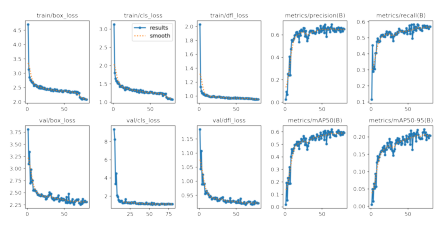

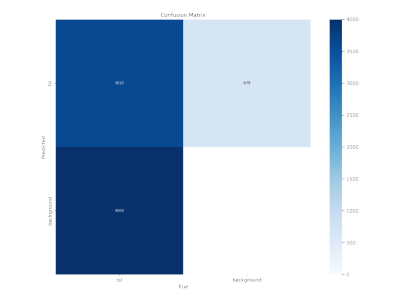

2025-04-16 15:52:06,650 - clearml.storage - INFO - Uploading: 18.26MB to YOLO11s/3_aug/weights/best.pt


████████████████▉                55% | 10.00/18.26 MB [00:00<00:00, 29.06MB/s]: 

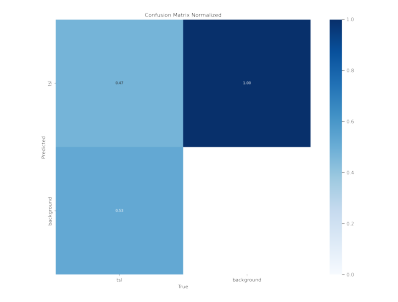

█████████████████████████▍       82% | 15.00/18.26 MB [00:00<00:00, 21.08MB/s]: 

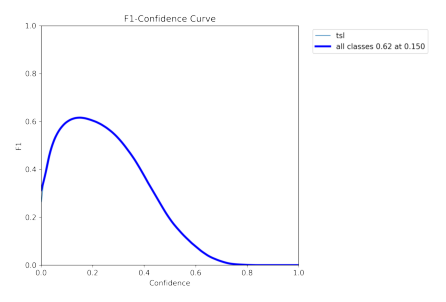

██████████████████████████████▉ 100% | 18.25/18.26 MB [00:00<00:00, 20.46MB/s]: 

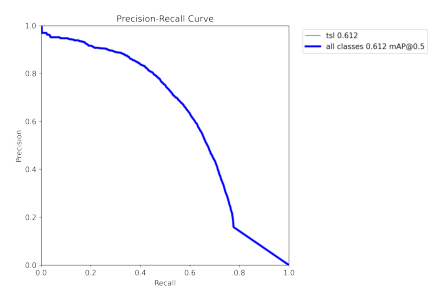

/home/user/.local/lib/python3.10/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
███████████████████████████████ 100% | 18.26/18.26 MB [00:01<00:00, 16.11MB/s]: 

2025-04-16 15:52:07,795 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/YOLO11s/3_aug.848f1c6f981047b0a1e375f895e0b335/models/best.pt


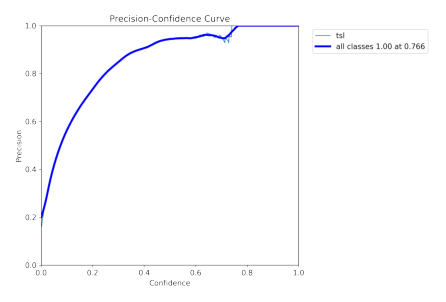

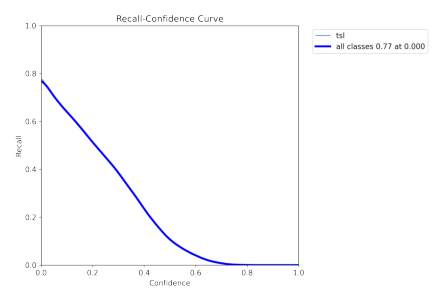

2025-04-16 15:52:09,406 - clearml.storage - INFO - Uploading: 0.92MB to YOLO11s/3_aug/val_batch0_labels.jpg


████████████████████████████████▊  99% | 0.92/0.92 MB [00:01<00:00,  1.19s/MB]: 


In [5]:
model.train(data='data.yaml ', epochs=80, imgsz=416,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO11s', name='3_aug',
            batch=32, device=device, seed=69,
            degrees=15,
            mixup=0.2)

In [6]:
df = pd.read_csv('YOLO11s/3_aug/results.csv')

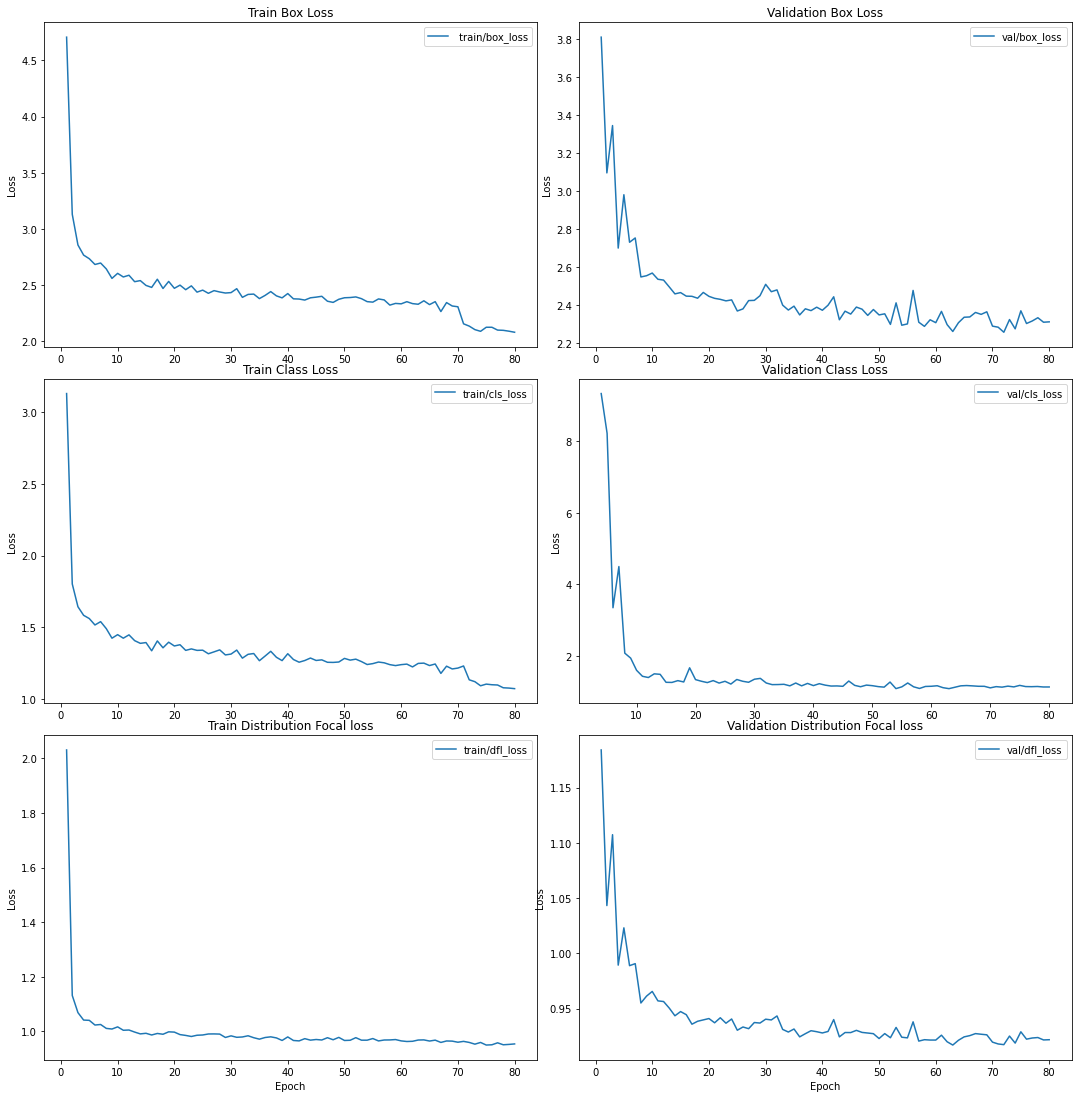

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

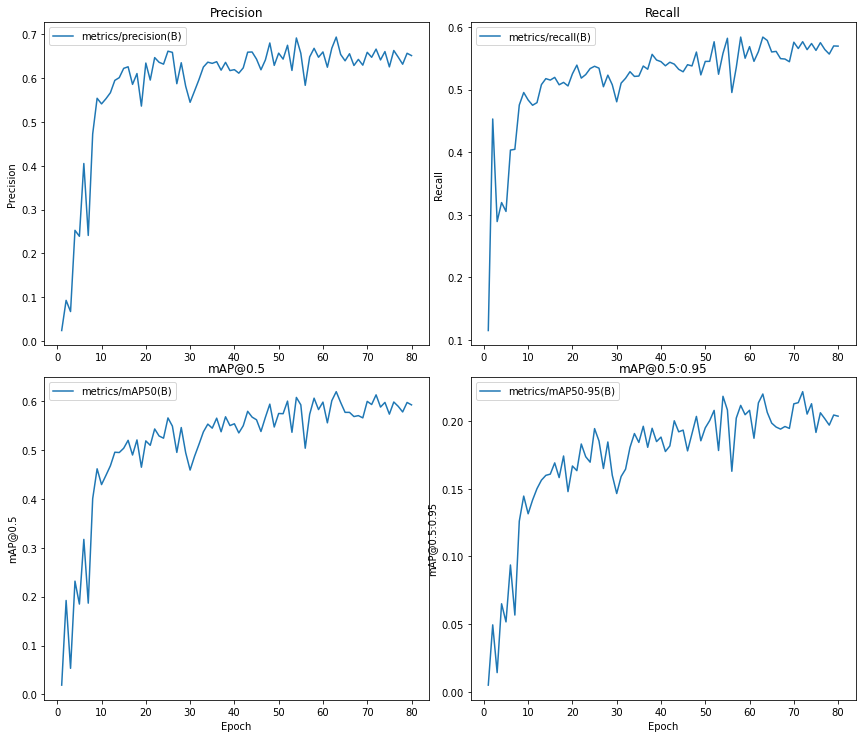

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

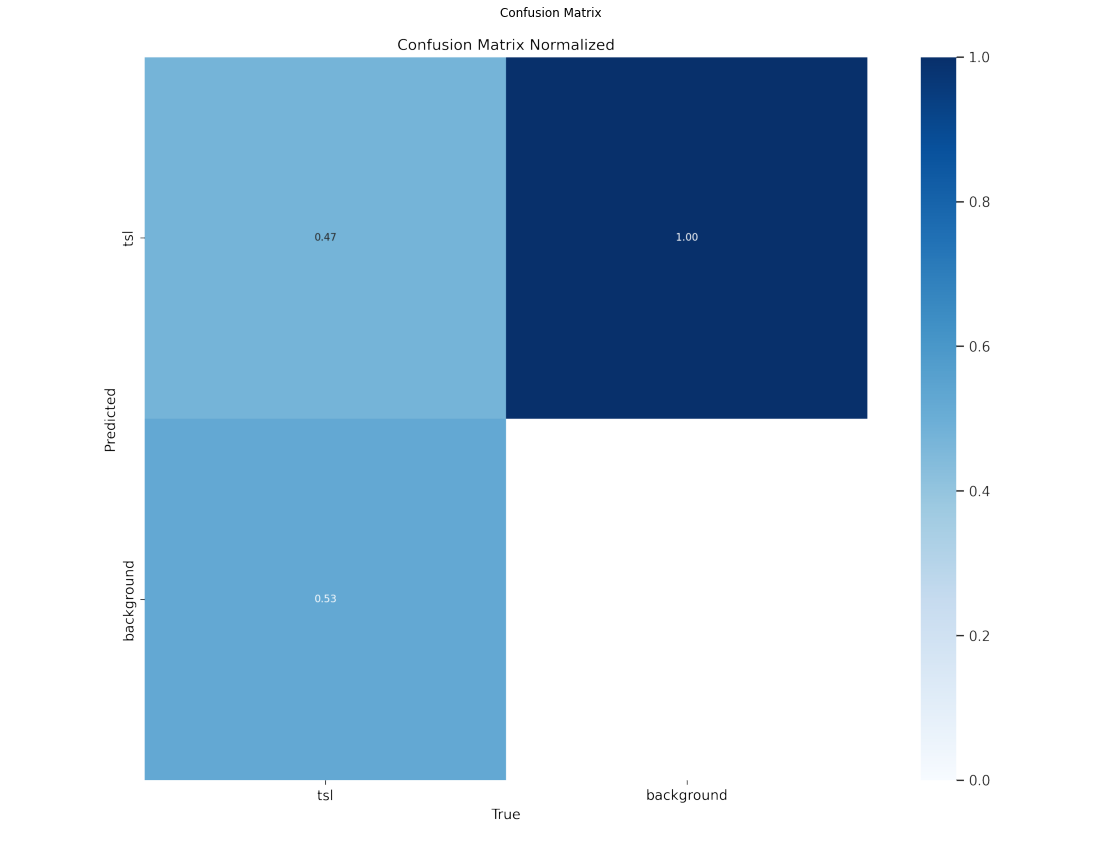

In [9]:
confusion_matrix = Image.open("YOLO11s/3_aug/confusion_matrix_normalized.png")
plt.figure(figsize=(20, 15))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/datasets/Maize_Tassel_Small/test/images/DJI_0103-2-_1_0_jpg.rf.b647a7f2d546429c7f2e8d7e824c8fc9.jpg: 288x416 16 tsls, 147.1ms
Speed: 1.1ms preprocess, 147.1ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 416)


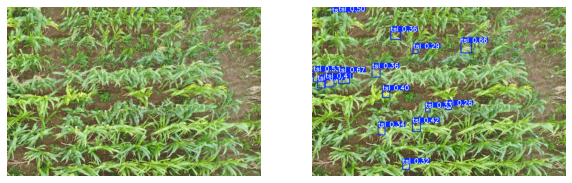

In [10]:
res = model('/home/user/CourseWork/datasets/Maize_Tassel_Small/test/images/DJI_0103-2-_1_0_jpg.rf.b647a7f2d546429c7f2e8d7e824c8fc9.jpg')
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Отображение первого изображения
axes[0].imshow(plt.imread('/home/user/CourseWork/datasets/Maize_Tassel_Small/test/images/DJI_0103-2-_1_0_jpg.rf.b647a7f2d546429c7f2e8d7e824c8fc9.jpg'))
axes[0].axis('off')

# Отображение результатов модели
axes[1].imshow(detect_img)
axes[1].axis('off')

plt.show();